In [75]:
import torch
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

imageSize = 15
upSampling = 8
batchSize = 16
workers = 2
dataroot = './HR_data'

transform = transforms.Compose([transforms.RandomCrop(imageSize*upSampling), transforms.ToTensor()])

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])

unnormalize = transforms.Normalize(mean = [-2.118, -2.036, -1.804], std = [4.367, 4.464, 4.444])

scale = transforms.Compose([transforms.ToPILImage(),
                            transforms.Scale(imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
                            ])

dataset = datasets.ImageFolder(root=dataroot, transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batchSize, shuffle=True, num_workers=int(workers))

low_res = torch.FloatTensor(batchSize, 3, imageSize, imageSize)


for i, data in enumerate(dataloader):
    high_res_real, _ = data

    # Downsample images to low resolution
    for j in range(batchSize):
        low_res[j] = scale(high_res_real[j])
        high_res_real[j] = normalize(high_res_real[j])
              
    high_res_real = Variable(high_res_real)
     

Generator pre-training


In [76]:
high_res_real.shape

torch.Size([16, 3, 120, 120])

In [77]:
img = to_pil(unnormalize(high_res_real.data[-1]))

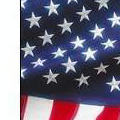

In [78]:
img

In [79]:
img = to_pil(unnormalize(low_res[-1]))

In [80]:
img